In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define dataset path
dataset_path = "CNN_dataset"  # Replace with your dataset folder path

# Image properties+
img_size = (128, 128)  # Resize all images
batch_size = 32
num_classes = 9  # Update to reflect 9 classes

# Step 1: Verify dataset structure
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset path '{dataset_path}' does not exist!")

print("Dataset structure:")
for label in os.listdir(dataset_path):
    print(f" - {label}: {len(os.listdir(os.path.join(dataset_path, label)))} images")

# Step 2: Data generators with validation split
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    subset='training'
)

# Validation generator
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Step 3: Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Multi-class classification
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train model
epochs = 30

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Step 5: Save model
model.save("multi_class_anomaly_model.h5")
print("Model training complete and saved as multi_class_anomaly_model.h5")

Dataset structure:
 - cheat passing: 210 images
 - copying: 201 images
 - discussing: 201 images
 - normal: 206 images
 - peeking: 201 images
 - showing answer: 201 images
 - suspicious: 207 images
 - using copy cheat: 201 images
 - using mobile: 201 images
Found 1465 images belonging to 9 classes.
Found 364 images belonging to 9 classes.


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 14s 234ms/step - accuracy: 0.1845 - loss: 2.4321 - val_accuracy: 0.5742 - val_loss: 1.3495
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.5269 - loss: 1.3851 - val_accuracy: 0.6703 - val_loss: 1.0172
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.6636 - loss: 1.0053 - val_accuracy: 0.7473 - val_loss: 0.7788
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.7263 - loss: 0.8330 - val_accuracy: 0.7747 - val_loss: 0.7065
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.7703 - loss: 0.6763 - val_accuracy: 0.8104 - val_loss: 0.6014
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - accuracy: 0.7878 - loss: 0.6051 - val_accuracy: 0.7885 - val_loss: 0.6015
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.7931 - loss: 0.5774 - val_accuracy: 0.8159 - val_loss: 0.5891
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.8183 - loss: 0.5403 - val_accuracy: 0.846

Model training complete and saved as multi_class_anomaly_model.h5


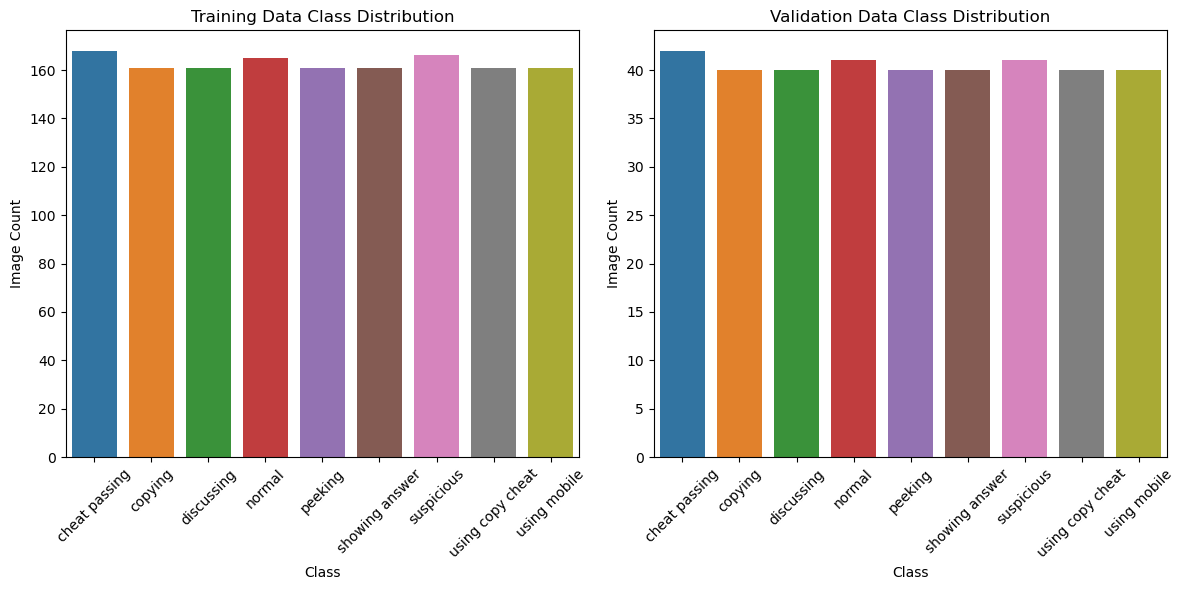

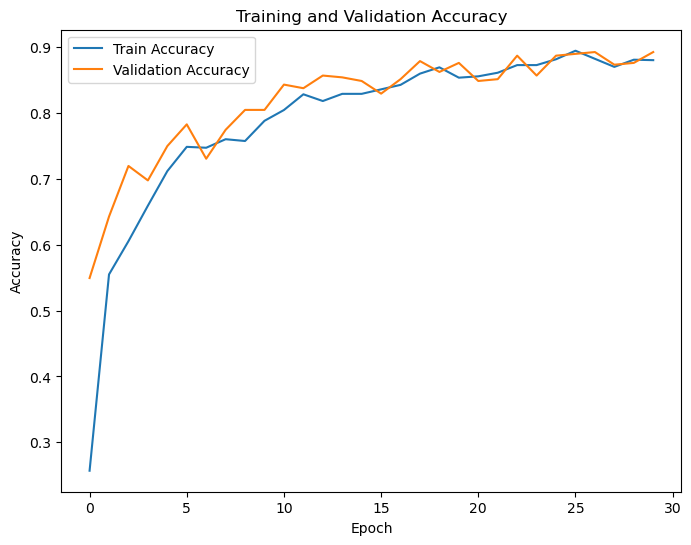

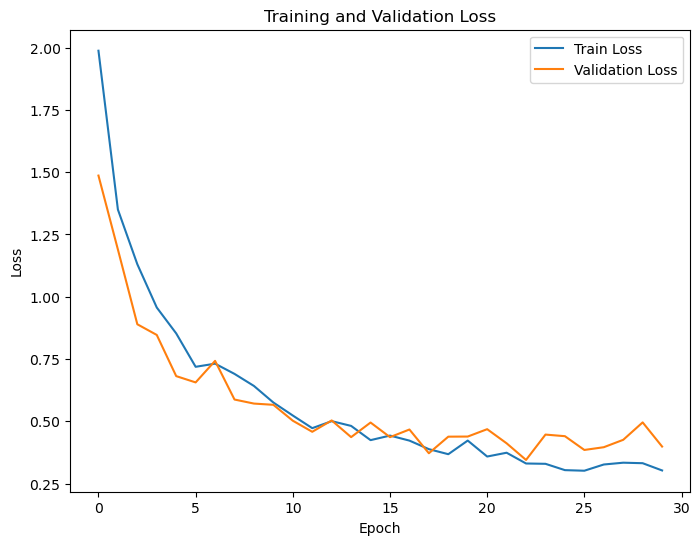

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Step 6: Visualizing Class Distribution
# Count images per class
train_class_counts = Counter(train_generator.classes)
val_class_counts = Counter(validation_generator.classes)

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Plot train and validation class distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()), ax=ax[0])
ax[0].set_title("Training Data Class Distribution")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Image Count")
ax[0].set_xticklabels(class_labels, rotation=45)

sns.barplot(x=list(val_class_counts.keys()), y=list(val_class_counts.values()), ax=ax[1])
ax[1].set_title("Validation Data Class Distribution")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Image Count")
ax[1].set_xticklabels(class_labels, rotation=45)

plt.tight_layout()
plt.show()

# Step 7: Plot Training History
# Training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

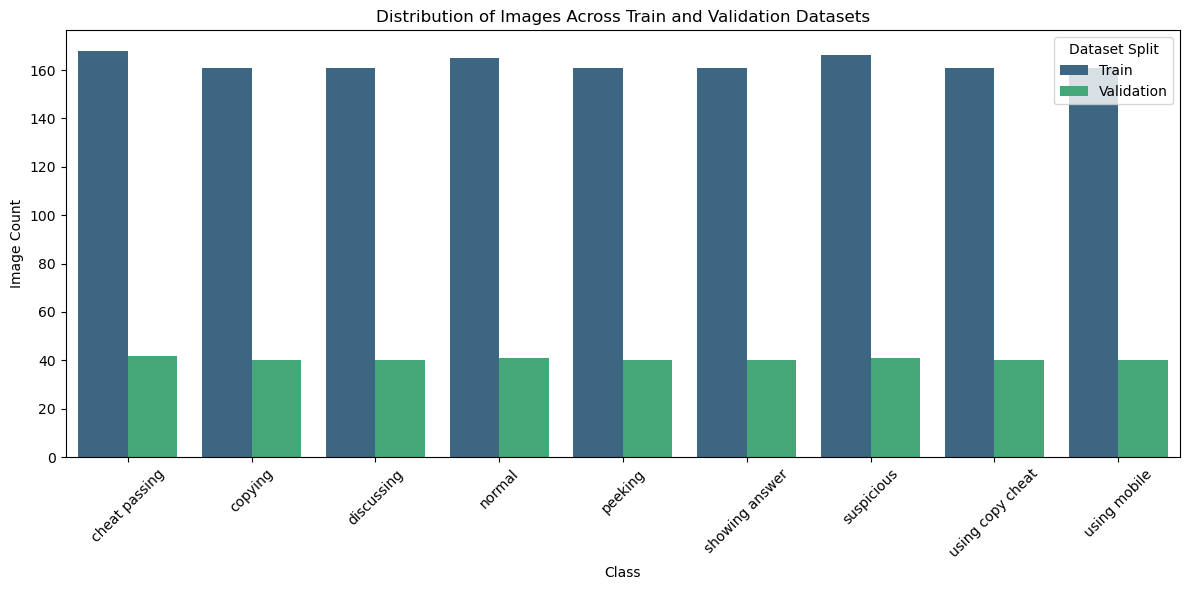

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Step 1: Count the number of images in each dataset split
# Training data
train_class_counts = Counter(train_generator.classes)
train_classes = list(train_generator.class_indices.keys())

# Validation data
val_class_counts = Counter(validation_generator.classes)

# If you have a test set, include its distribution (replace `test_generator` with your test generator)
# test_class_counts = Counter(test_generator.classes)

# Step 2: Prepare data for visualization
train_counts = [train_class_counts[i] for i in range(len(train_classes))]
val_counts = [val_class_counts[i] for i in range(len(train_classes))]
# test_counts = [test_class_counts[i] for i in range(len(train_classes))]  # Uncomment if test set exists

# Combine the counts into a dataframe for easier visualization
import pandas as pd

data = pd.DataFrame({
    "Class": train_classes,
    "Train": train_counts,
    "Validation": val_counts,
    # "Test": test_counts  # Uncomment if test set exists
})

# Step 3: Plot the data
data_melted = pd.melt(data, id_vars=["Class"], var_name="Dataset", value_name="Image Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=data_melted, x="Class", y="Image Count", hue="Dataset", palette="viridis")
plt.title("Distribution of Images Across Train and Validation Datasets")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.legend(title="Dataset Split")
plt.tight_layout()
plt.show()
